<a href="https://colab.research.google.com/github/ShoukkiyaAshraf/Machine-Learning/blob/master/Naive_Bayes_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB , GaussianNB , MultinomialNB , ComplementNB


In [0]:
#function to get x axis and y axis values :

def make_meshgrid(x,y,h=.02):
  x_min,x_max = x.min()-1,x.max()+1
  y_min,y_max = y.min()-1,y.max()+1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

In [0]:
def plot_contours(ax,clf,xx,yy,**params):
  # ax : maxplotplib axis object
  z = clf.predit(np.c_[xx.ravel(),yy.ravel()]) #np.c_ will concatanate the two arrays as[x0,y0][x1,y1]...
  z = z.reshape(xx.shape)
  out = ax.contourf(xx,yy,z,**params)
  return out
  

In [0]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target


In [32]:
'''
Gaussian Naive Bayes (GaussianNB)
Parameters:
priors           : Prior probabilities of the classes
var_smoothing    : Portion of the largest variance of all features
             that is added to variances for calculation stability. 
              Otional (default=1e-9)
      
Multinomial Naive Bayes (MultinomialNB)
Parameters:
alpha           : Additive smoothing parameter optional (default=1.0).
fit_prior       : Whether to learn class prior probabilities or not.Optional (default=True)
class_prior     : Prior probabilities of the classes. 
           Optional (default=None)
        
Complement Naive Bayes (ComplementNB)
Parameters:
alpha           : Additive smoothing parameter optional (default=1.0).
fit_prior       : Whether to learn class prior probabilities or not.Optional (default=True)
class_prior     : Prior probabilities of the classes. Optional (default=None)
norm            : Whether or not a second normalization of the weights is performed,
           optional(default=False)
           
Bernoulli Naive Bayes (BernoulliNB)
Parameters:
alpha           : Additive smoothing parameter optional (default=1.0).
binarize        : Threshold for binarizing of sample features.optional (default=0.0)
fit_prior       : Whether to learn class prior probabilities or not.Optional (default=True)
class_prior     : Prior probabilities of the classes. Optional (default=None)

'''


'\nGaussian Naive Bayes (GaussianNB)\nParameters:\npriors           : Prior probabilities of the classes\nvar_smoothing    : Portion of the largest variance of all features\n             that is added to variances for calculation stability. \n              Otional (default=1e-9)\n      \nMultinomial Naive Bayes (MultinomialNB)\nParameters:\nalpha           : Additive smoothing parameter optional (default=1.0).\nfit_prior       : Whether to learn class prior probabilities or not.Optional (default=True)\nclass_prior     : Prior probabilities of the classes. \n           Optional (default=None)\n        \nComplement Naive Bayes (ComplementNB)\nParameters:\nalpha           : Additive smoothing parameter optional (default=1.0).\nfit_prior       : Whether to learn class prior probabilities or not.Optional (default=True)\nclass_prior     : Prior probabilities of the classes. Optional (default=None)\nnorm            : Whether or not a second normalization of the weights is performed,\n        

In [0]:
models = (GaussianNB(),MultinomialNB(),ComplementNB(),
          BernoulliNB())
#creating models : 

models = (clf.fit(x,y)for clf in models)


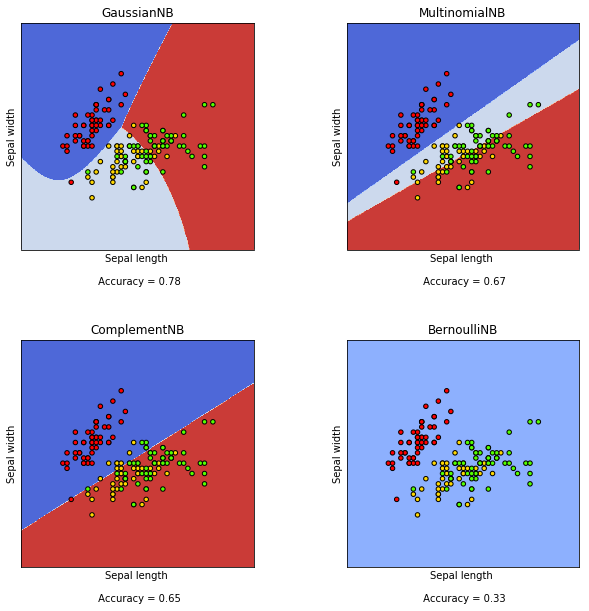

In [34]:
titles = ('GaussianNB','MultinomialNB','ComplementNB',
          'BernoulliNB') # Titles for plotes 
fig,sub = plt.subplots(2,2,figsize=(10,10))
plt.subplots_adjust(wspace=0.4,hspace=0.4)

#Select sepal length values as X0
X0 = x[:,0]

#Select sepal width values as X1
X1 = x[:,1]

xx,yy = make_meshgrid(X0,X1) #function call to get axis values

for clf,title,graph in zip(models,titles,sub.flatten()):
  model = clf.fit(x,y) #Train the object with the data
  pred = model.predict(np.c_[xx.ravel(),yy.ravel()])
  pred_values = model.predict(np.c_[X0.ravel(),X1.ravel()])
  accuracy_value = accuracy_score(y, pred_values)
  pred = pred.reshape(xx.shape)
  graph.contourf(xx, yy, pred, cmap=plt.cm.coolwarm)
  graph.scatter(X0, X1, c=y, cmap='prism', s=20,edgecolors='k')
  graph.set_xlim(xx.min(), xx.max())
  graph.set_ylim(yy.min(), yy.max())
  x_label='Sepal length \n\n Accuracy = '+str("%.2f"% accuracy_value)
  graph.set_xlabel(x_label)
  graph.set_ylabel("Sepal width")
  graph.set_title(title)
  graph.set_xticks(())
  graph.set_yticks(())
plt.show()
  


